In [ ]:
from google.colab import files
import os

In [ ]:
if not(os.path.exists("kaggle.json")):
  files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=732f5eaa36a59b31881df647c63b85bd215c9546023e6e3285106b92425f48c4
  Stored in directory: /root/.cache/pip/wheels/e6/8e/67/e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ejlok1/cremad
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 447M/451M [00:03<00:00, 138MB/s]
100% 451M/451M [00:03<00:00, 145MB/s]
 98% 421M/429M [00:05<00:00, 82.5MB/s]
100% 429M/429M [00:05<00:00, 76.6MB/s]
 98% 418M/428M [00:04<00:00, 112MB/s]
100% 428M/428M [00:05<00:00, 87.4MB/s]


In [ ]:
# initiating directory path
CREME = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/CREME/AudioWAV/'
rav = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/ravdess/'
TESS = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/TESS TORONTO/TESS Toronto emotional speech set data/'

In [ ]:
os.makedirs(CREME)
os.makedirs(rav)
os.makedirs(TESS)

In [ ]:
!unzip "/content/cremad.zip" -d '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/CREME/AudioWAV/'

In [ ]:
!unzip "/content/ravdess-emotional-speech-audio.zip" -d '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/ravdess/'

In [ ]:
!rm -rf '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/ravdess/audio_speech_actors_01-24'

In [ ]:
!ls -al

In [ ]:
!unzip "/content/toronto-emotional-speech-set-tess.zip" -d '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/TESS TORONTO/TESS Toronto emotional speech set data/'

In [ ]:
CREME = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/CREME/AudioWAV/AudioWAV/'
rav = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/ravdess/'
TESS = '/content/drive/MyDrive/SPEECH EMOTION REGCONITION/TESS TORONTO/TESS Toronto emotional speech set data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/'

In [ ]:
#Importing The Dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import IPython.display as ipd
from librosa.display import waveshow
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import os

# loading CREME data, create list of emtions and path for audio files

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in os.listdir(CREME): 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREME + i)
    
creme_df = pd.DataFrame(emotion, columns = ['labels'])
creme_df['source'] = 'CREMA'
creme_df = pd.concat([creme_df,pd.DataFrame(path, columns = ['path'])],axis=1)
creme_df.labels.value_counts()

male_disgust      671
male_fear         671
male_angry        671
male_sad          671
male_happy        671
female_fear       600
female_disgust    600
female_happy      600
female_sad        600
female_angry      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
creme_df.head()

,labels,source,path
0,female_fear,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,male_disgust,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,male_neutral,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,female_disgust,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,female_happy,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
# loading ravdess data

dir_list = os.listdir(rav)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(rav + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(rav + i + '/' + f)

rav_df = pd.DataFrame(emotion)
rav_df = rav_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
rav_df = pd.concat([pd.DataFrame(gender),rav_df],axis=1)
rav_df.columns = ['gender','emotion']
rav_df['labels'] =rav_df.gender + '_' + rav_df.emotion
rav_df['source'] = 'RAVDESS'  
rav_df = pd.concat([rav_df,pd.DataFrame(path, columns = ['path'])],axis=1)
rav_df =rav_df.drop(['gender', 'emotion'], axis=1)
rav_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_fear           96
male_disgust        96
male_surprise       96
male_sad            96
male_happy          96
male_angry          96
female_surprise     96
female_happy        96
female_fear         96
female_disgust      96
female_sad          96
female_angry        96
Name: labels, dtype: int64

In [ ]:
rav_df.head()

,labels,source,path
0,male_fear,RAVDESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,male_neutral,RAVDESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,male_disgust,RAVDESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,male_disgust,RAVDESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,male_neutral,RAVDESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
# loading tess data

path = []
emotion = []

for i in os.listdir(TESS) :
  fname = os.listdir(TESS + i) 
  for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

tess_df = pd.DataFrame(emotion, columns = ['labels'])
tess_df['source'] = 'TESS'
tess_df = pd.concat([tess_df,pd.DataFrame(path, columns = ['path'])],axis=1)
tess_df.labels.value_counts()

female_disgust     400
female_fear        400
female_happy       400
female_angry       400
female_neutral     400
female_surprise    400
female_sad         400
Name: labels, dtype: int64

In [ ]:
tess_df.head(10)

,labels,source,path
0,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
5,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
6,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
7,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
8,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
9,female_disgust,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
tess_df.iloc[0,1]

'TESS'

In [ ]:
# combining all dataframe

audio_df  = pd.concat([
    creme_df,rav_df,tess_df
],axis = 0)

audio_df.reset_index(drop = 'index',inplace = True)

In [ ]:
audio_df

,labels,source,path
0,female_fear,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
1,male_disgust,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
2,male_neutral,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
3,female_disgust,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
4,female_happy,CREMA,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
...,...,...,...
11677,female_surprise,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
11678,female_surprise,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
11679,female_surprise,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...
11680,female_surprise,TESS,/content/drive/MyDrive/SPEECH EMOTION REGCONIT...


In [ ]:
# saving audio_csv
audio_df.to_csv('audio.csv')

In [ ]:
len(audio_df)

11682

Feature Extraction

In [ ]:
def feature_extraction(file) :
  mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 20)
  mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
  return mfcc_scaled_feature


In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [ ]:
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
#higher speed
def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)
# lower speed
def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

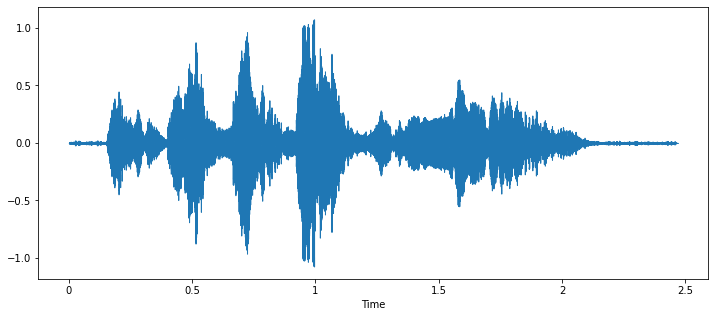

In [ ]:
# NORMAL AUDIO

import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

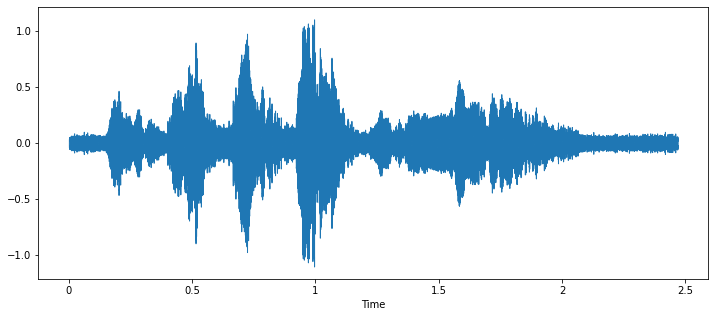

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

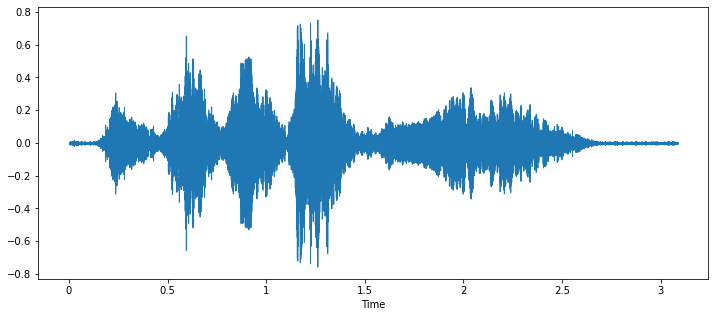

In [ ]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

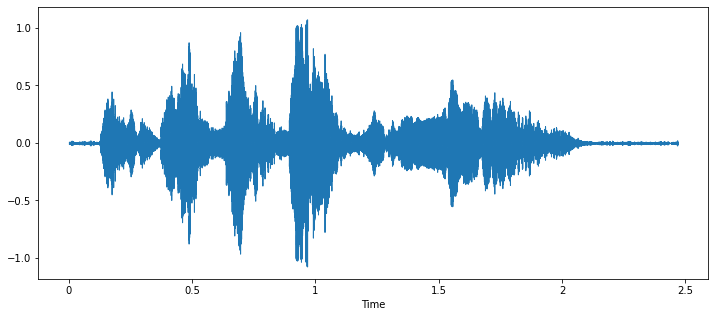

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

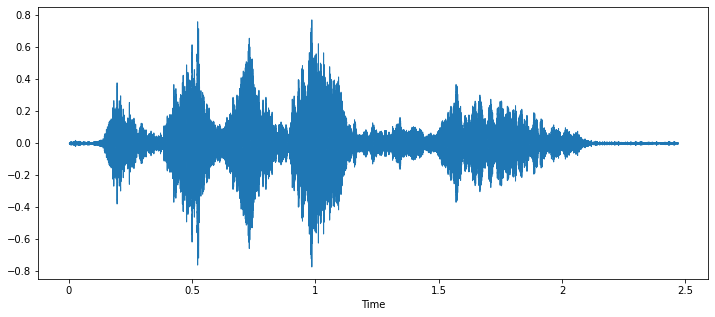

In [ ]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

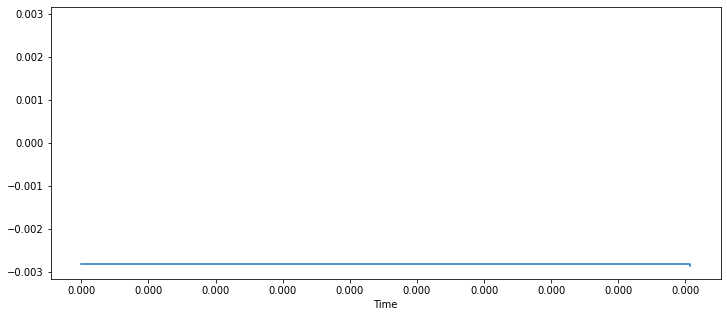

In [ ]:
# AUDIO WITH high speed
x = higher_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

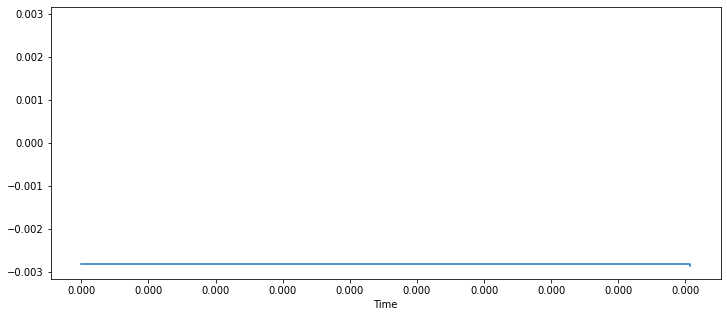

In [ ]:
x = lower_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [ ]:
def get_feat(path):
    # load data and sample rate
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # initialize an empty list to store all the features
    all_features = []

    # apply each modification to the data and extract the features
    for transform_func in [lambda x: x, noise, stretch, higher_speed, lower_speed]:
        transformed_data = transform_func(data)
        features = feature_extraction(transformed_data)
        all_features.append(features)

    # stack all the features vertically to create a single matrix
    result = np.vstack(all_features)

    return result


In [ ]:
from tqdm import tqdm
x = []
y = []

for path,emotion in tqdm(zip(audio_df['path'],audio_df['labels'])) :
   feature = get_feat(path)
   for ele in feature :
     x.append(ele)
     y.append(emotion)

11682it [34:17,  5.68it/s]


In [ ]:
Emotions = pd.DataFrame(x)
Emotions['labels'] = y
Emotions.to_csv('/content/drive/MyDrive/SPEECH EMOTION REGCONITION/emotion.csv', index=False)

In [ ]:
len(Emotions)

58410

In [ ]:
Emotions= pd.read_csv('/content/drive/MyDrive/SPEECH EMOTION REGCONITION/emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-256.463074,106.242203,-16.585012,35.268433,-15.146743,-3.007280,-13.700351,-1.765109,-13.952430,-4.795234,...,-12.883720,-0.493155,-12.741355,-0.797308,-9.389345,-0.134966,0.326236,6.166177,10.065923,female_fear
1,-244.291129,96.695523,-13.033749,30.262419,-11.938872,-4.963746,-11.842442,-2.535518,-13.462182,-4.806314,...,-12.103472,-1.698116,-11.441667,-1.846017,-8.312006,-0.706154,0.461771,5.977908,9.717269,female_fear
2,-283.601105,101.506866,-18.631834,32.850853,-13.930242,-4.668154,-14.135448,-3.070435,-14.394492,-5.025723,...,-12.441570,-0.975295,-12.097193,-0.389390,-8.524179,-0.412000,1.347744,7.206112,10.195252,female_fear
3,-291.052277,117.102562,-27.094448,40.327106,-22.185534,1.034903,-17.504580,0.276941,-15.248628,-4.589023,...,-13.800173,0.881900,-15.014283,0.486866,-11.391521,-0.860980,-0.961874,7.170586,11.259021,female_fear
4,-287.983307,105.311127,-18.673262,34.956581,-15.138723,-1.771229,-13.989065,-1.783059,-14.398529,-5.416751,...,-12.628548,-0.274193,-12.939730,-0.152140,-9.071409,-0.126106,0.975130,7.183266,11.063148,female_fear


Pre processing

In [ ]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# create a LabelEncoder object to encode the emotion labels
lb = LabelEncoder()

Y = lb.fit_transform(Y)



In [ ]:
print(lb.classes_)

['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((46728, 20), (46728, 14), (11682, 20), (11682, 14))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((46728, 20), (46728, 14), (11682, 20), (11682, 14))

In [ ]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(f'the training score for decision tree is {clf.score(x_train,y_train)}')


the training score for decision tree is 0.9996575928779319


In [ ]:
print(f'the test score for decision tree is {clf.score(x_test,y_test)}')

the test score for decision tree is 0.5662557781201849


MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [ ]:
print(f"Training set score: {(clf2.score(x_train, y_train))}")
print(f"Test set score: {(clf2.score(x_test, y_test))}")

Training set score: 0.6405795240541003
Test set score: 0.5530731039205615


In [ ]:
import tensorflow as tf
#from tensorflow_estimator.python.estimator.canned.dnn import dnn_logit_fn_builder
#import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

CNN

In [ ]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((46728, 20, 1), (46728, 14), (11682, 20, 1), (11682, 14))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,)

In [ ]:
my_model=Sequential()
my_model.add(Conv1D(448, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(224, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(224, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(112, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=56, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=14, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 448)           3584      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 448)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 10, 448)          1792      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 224)           702688    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 224)           0         
 1D)                                                             
                                                        

In [ ]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test),callbacks = early_stopping)

In [ ]:
# get the epoch where early stopping occurred
stopped_epoch = early_stopping.stopped_epoch
stopped_epoch

32

In [ ]:
print(y_test[1])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


'yy= y_test[1]\n\ny_original = lb.inverse_transform(yy)\nprint(y_original)'

366/366 [==============================] - 5s 12ms/step - loss: 0.4667 - accuracy: 0.8666
Accuracy of our model on test data :  87.0 %


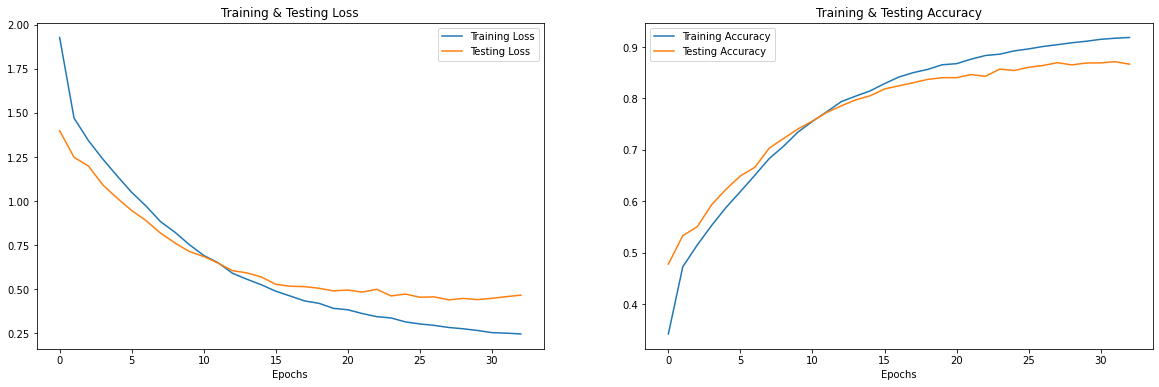

In [ ]:
print("Accuracy of our model on test data : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")

epochs = [i for i in range(stopped_epoch+1)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
json_string = my_model.to_json() # as json 
open('model.json', 'w').write(json_string)
# save the weights in h5 format 
my_model.save_weights('model_wts.h5')

#tfjs.converters.save_keras_model(my_model, 'models')

In [ ]:
## saving model
import os
from datetime import datetime
def save_model(model , suffix = None) :
  modeldir = os.path.join('/content/drive/MyDrive/SPEECH EMOTION REGCONITION',datetime.now().strftime('%Y%m%d-%H%M%S'))
  modelpath = modeldir + '-' + suffix + '.h5'
  print(f'saving model into {modelpath}')
  model.save(modelpath)
  return modelpath

In [ ]:
from keras.models import Sequential, Model, model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_wts.h5")
print("Loaded model from disk")
 
# Keras optimiser
#opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 86.66%


In [ ]:
save_model(my_model,suffix = 'speech_emotion_recognition_model')

saving model into /content/drive/MyDrive/SPEECH EMOTION REGCONITION/20230303-073314-speech_emotion_recognition_model.h5


'/content/drive/MyDrive/SPEECH EMOTION REGCONITION/20230303-073314-speech_emotion_recognition_model.h5'

In [ ]:
preds = loaded_model.predict(x_test, 
                         batch_size=32, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

366/366 [==============================] - 4s 11ms/step


9

In [ ]:
preds = preds.astype(int).flatten()
print(preds)
preds = (lb.inverse_transform((preds)))
print(preds)
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[190:200]

[ 9  3 12 ...  5  2  0]
['male_fear' 'female_happy' 'male_sad' ... 'female_sad' 'female_fear'
 'female_angry']


,actualvalues,predictedvalues
190,male_fear,female_fear
191,female_happy,female_happy
192,male_happy,male_happy
193,female_neutral,female_neutral
194,female_fear,female_fear
195,male_happy,male_happy
196,female_angry,female_angry
197,male_sad,male_sad
198,female_happy,female_happy
199,female_neutral,female_neutral


In [ ]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,1118
female_disgust,1102
female_fear,1049
female_happy,1045
female_neutral,1081
female_sad,1177
female_surprise,509
male_angry,828
male_disgust,806


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
#plot_confusion_matrix(c, class_names = classes)

0.8666324259544599


In [ ]:
finaldf.head()

,actualvalues,predictedvalues
0,male_fear,male_fear
1,female_happy,female_happy
2,male_neutral,male_sad
3,male_neutral,male_neutral
4,female_angry,female_angry


In [ ]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(cf_matrix)

[[1050   18   22   20    3    0    0    3    2    3    5    1    1    0]
 [  14  953   21   22   30   37    8    1    9    2    2    0    0    0]
 [  10   26  912   20   27   50    9    0    1    9    1    0    0    0]
 [  26   21   36  948   11    7    8    0    0    1    4    1    0    0]
 [   5   27   13   11  976   45    0    0    2    2    0    3    3    0]
 [   0   32   25    5   16  990    0    0    1    7    0    2    4    0]
 [   1    2    2    3    1    0  484    0    0    0    1    0    0    0]
 [   6    0    1    1    1    1    0  730   22   19   11    5    3    1]
 [   1   15    1    4    5   12    0   19  636   34   10    8   24    0]
 [   2    1    9    0    1   10    0   25   32  650   11   16   25    0]
 [   3    4    4   10    2    2    0   45   38   49  566   28    5    2]
 [   0    0    1    1    5    4    0    3   34   27   22  559   41    2]
 [   0    3    2    0    3   19    0    2   28   94    0   23  596    0]
 [   0    0    0    0    0    0    0    0    1    5

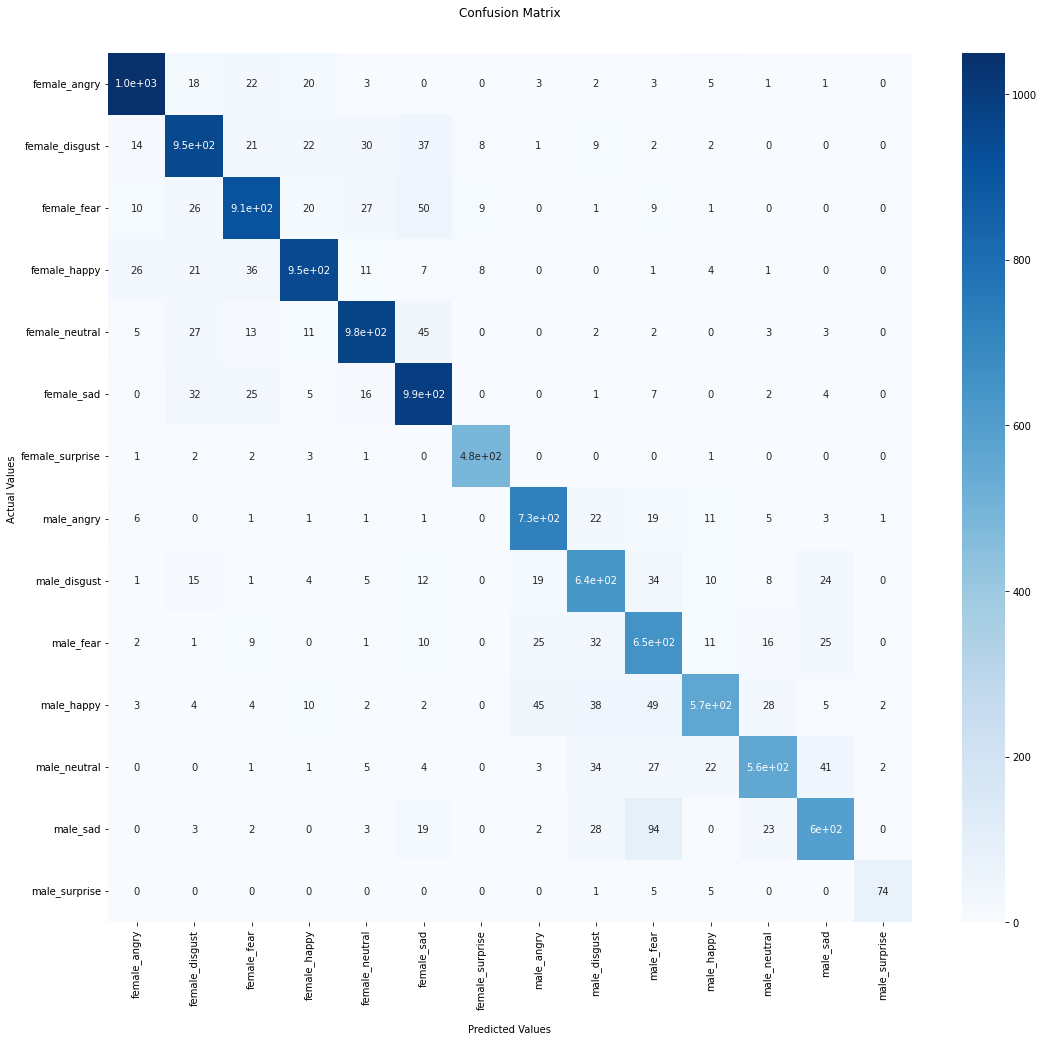

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['female_angry' ,'female_disgust' ,'female_fear', 'female_happy',
 'female_neutral', 'female_sad' ,'female_surprise' ,'male_angry',
 'male_disgust', 'male_fear' ,'male_happy', 'male_neutral', 'male_sad',
 'male_surprise']

plt.figure(figsize=(18, 16))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()

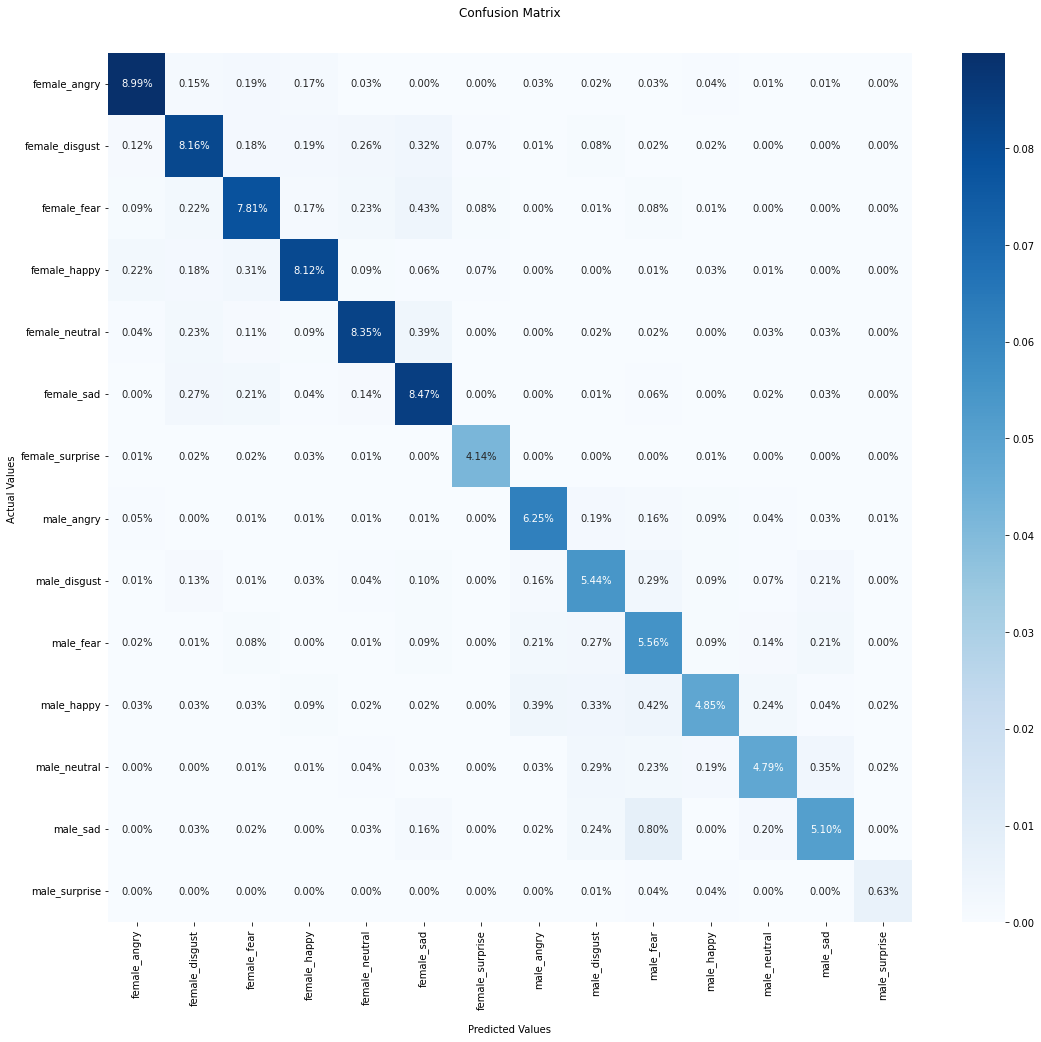

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['female_angry' ,'female_disgust' ,'female_fear', 'female_happy',
 'female_neutral', 'female_sad' ,'female_surprise' ,'male_angry',
 'male_disgust', 'male_fear' ,'male_happy', 'male_neutral', 'male_sad',
 'male_surprise']

plt.figure(figsize=(18, 16))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=labels, yticklabels=labels)
#ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues)) 

                 precision    recall  f1-score   support

   female_angry       0.94      0.93      0.93      1128
 female_disgust       0.86      0.87      0.87      1099
    female_fear       0.87      0.86      0.86      1065
   female_happy       0.91      0.89      0.90      1063
 female_neutral       0.90      0.90      0.90      1087
     female_sad       0.84      0.91      0.88      1082
female_surprise       0.95      0.98      0.97       494
     male_angry       0.88      0.91      0.90       801
   male_disgust       0.79      0.83      0.81       769
      male_fear       0.72      0.83      0.77       782
     male_happy       0.89      0.75      0.81       758
   male_neutral       0.87      0.80      0.83       699
       male_sad       0.85      0.77      0.81       770
  male_surprise       0.94      0.87      0.90        85

       accuracy                           0.87     11682
      macro avg       0.87      0.86      0.87     11682
   weighted avg       0.87   

In [ ]:
def get_label_name(label):
    if label == 0:
        return 'female_angry'
    elif label == 1:
        return 'female_disgust'
    elif label == 2:
        return 'female_fear'
    elif label == 3:
        return 'female_happy'
    elif label == 4:
        return 'female_neutral'
    elif label == 5:
        return 'female_sad'
    elif label == 6:
        return 'female_surprise'
    elif label == 7:
        return 'male_angry'
    elif label == 8:
        return 'male_disgust'
    elif label == 9:
        return 'male_fear'
    elif label == 10:
        return 'male_happy'
    elif label == 11:
        return 'male_neutral'
    elif label == 12:
        return 'male_sad'
    elif label == 13:
        return 'male_surprise'
    else:
        return "unknown"




In [ ]:
paths = '/content/three-two-one-fight-deep-voice-38382.mp3'

fea = get_feat(path)

     
pr = scaler.fit_transform(fea)
prcnn =np.expand_dims(pr, axis=2)

#print(prcnn.shape)

preds = my_model.predict(prcnn, 
                         batch_size=32, 
                         verbose=1)
preds=preds.argmax(axis=1)

#print(preds)

pred_output = np.array(preds)
#print(pred_output)

# Find the index of the maximum value in the array
highest_prob_index = np.argmax(pred_output)


# The predicted class label is the index of the highest probability value
predicted_class = highest_prob_index
#print(predicted_class)

pr_label = get_label_name(predicted_class)
print(pr_label)


1/1 [==============================] - 0s 28ms/step
female_neutral
